In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

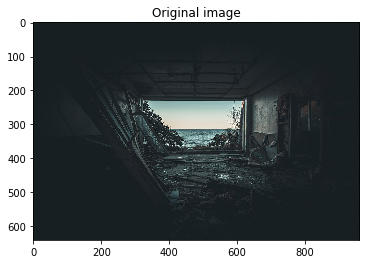

In [213]:
im = cv2.imread('ocean.jpg')
origrgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original image')
plt.show()  

In [214]:
x,y,w,h = cv2.selectROI(im, fromCenter=0)
cv2.destroyAllWindows(); 

In [215]:
mymask= np.zeros(im.shape[:2],  dtype = "uint8")

In [216]:
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255

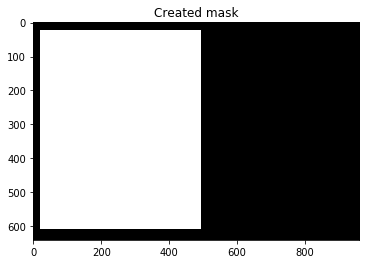

In [217]:
mask_rgb = cv2.cvtColor(mymask,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(mask_rgb)
plt.title('Created mask')
plt.show() 

In [218]:
cv2.imwrite('mask_image.png' , mymask)

True

In [219]:
imgHSV = cv2.cvtColor(im,cv2.COLOR_BGR2HSV);

In [220]:
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])

Text(0.5, 1.0, 'V plane')

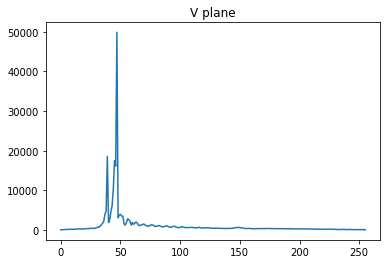

In [231]:
plt.plot(hist)
plt.title('V plane')

In [222]:
v= imgHSV[:,:,2]

In [223]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))

In [224]:
v[int(y):int(y+h) , int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , int(x):int(x+w)])

In [225]:
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])

Text(0.5, 1.0, 'enhanced V plane')

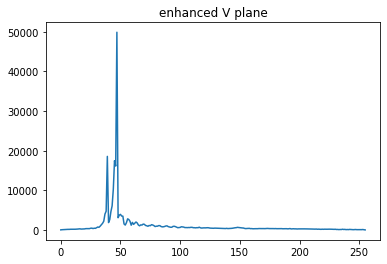

In [232]:
plt.plot(hist)
plt.title('enhanced V plane')

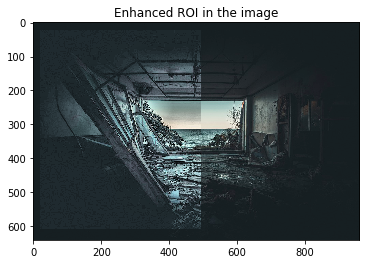

In [227]:
enhanced = cv2.cvtColor(imgHSV,cv2.COLOR_HSV2RGB);
imgplot = plt.imshow(enhanced)
plt.title('Enhanced ROI in the image')
plt.show() 